In [1]:
## Name : Lankagama L.S.
## Index Number : 190350F

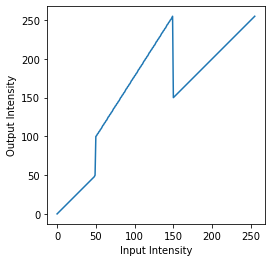

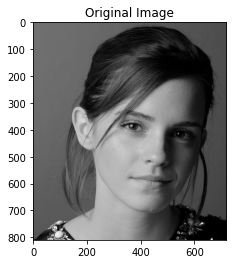

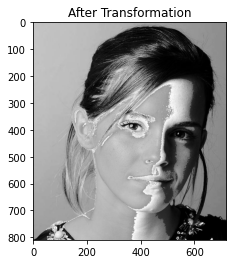

In [2]:
#Question 1 
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\Assignment\emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0 , 50, 50)
t2 = np.linspace(50 , 100, 0)
t3 = np.linspace(100 , 255, 100)
t4 = np.linspace(150 , 255, 0)
t5 = np.linspace(150 , 255, 106)

t = np.concatenate((t1, t2, t3, t4, t5), axis = 0).astype(np.uint8)
fig, ax = plt.subplots()
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
ax.plot(t)
ax.set_aspect("equal")
assert len(t) == 256
g = cv.LUT(f, t)

Img = cv.cvtColor(f, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.title("Original Image")
ax.imshow(Img)
plt.show()

img = cv.cvtColor(g , cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.title("After Transformation")
ax.imshow(img)
plt.show()

# cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
# cv.imshow("Image", f)
# cv.waitKey(0)
# cv.imshow("Image", g)
# cv.waitKey(0)
# cv.destroyAllWindows()

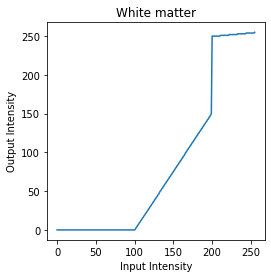

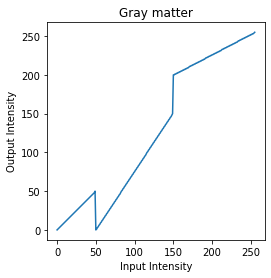

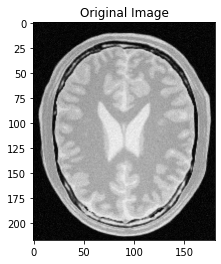

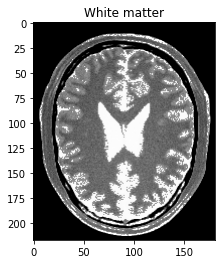

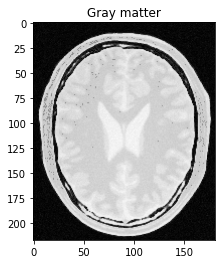

In [3]:
#Question 2 
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\Assignment\brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0, 0, 100)
t2 = np.linspace(100, 0, 0)
t3 = np.linspace(0, 150, 100)
t4 = np.linspace(150, 200, 0)
t5 = np.linspace(250, 255, 56)

t6 = np.linspace(0, 50, 50)
t7 = np.linspace(100, 0, 0)
t8 = np.linspace(0, 150, 100)
t9 = np.linspace(150, 200, 0)
t10 = np.linspace(200, 255, 106)

t_w = np.concatenate((t1, t2, t3, t4, t5), axis = 0).astype(np.uint8)
fig, ax = plt.subplots()
plt.title("White matter")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
ax.plot(t_w)
ax.set_aspect("equal")
assert len(t_w) == 256
g_w = cv.LUT(f, t_w)

t_g = np.concatenate((t6, t7, t8, t9, t10), axis = 0).astype(np.uint8)
fig, ax = plt.subplots()
plt.title("Gray matter")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
ax.plot(t_g)
ax.set_aspect("equal")
assert len(t_g) == 256
g_g = cv.LUT(f, t_g) 

Img = cv.cvtColor(f, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.title("Original Image")
ax.imshow(Img)
plt.show()

img = cv.cvtColor(g_w , cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.title("White matter")
ax.imshow(img)
plt.show()

img = cv.cvtColor(g_g , cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.title("Gray matter")
ax.imshow(img)
plt.show()

# cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
# cv.imshow("Image", f)
# cv.waitKey(0)
# cv.imshow("Image", g_w)
# cv.waitKey(0)
# cv.imshow("Image", g_g)
# cv.waitKey(0)
# cv.destroyAllWindows()

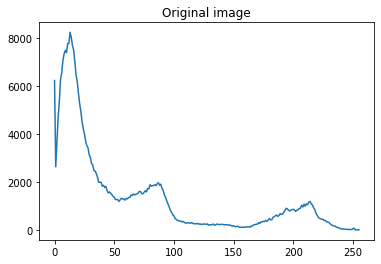

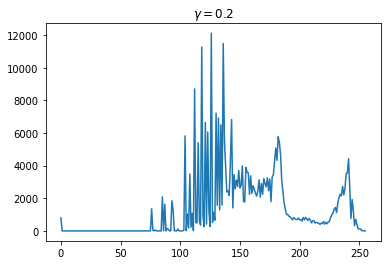

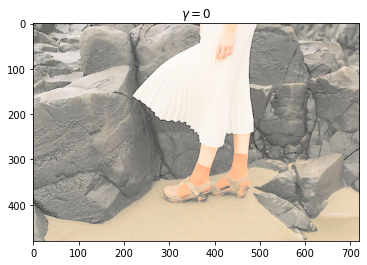

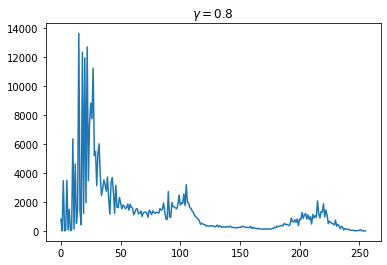

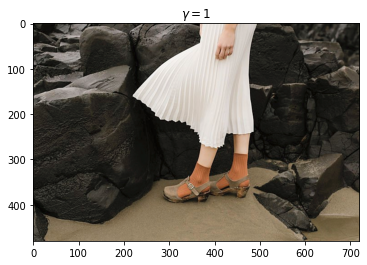

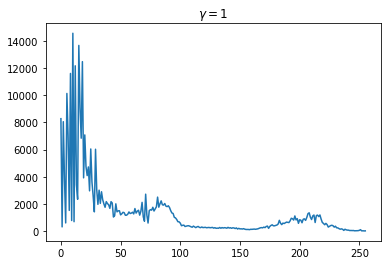

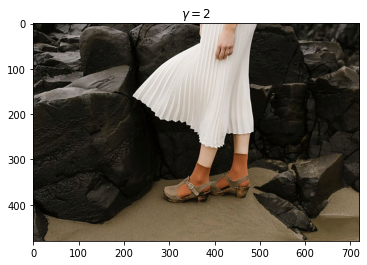

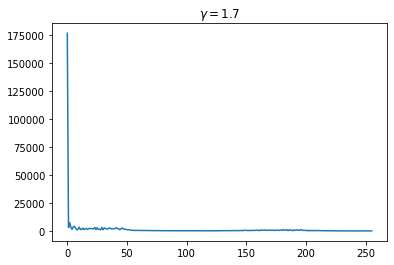

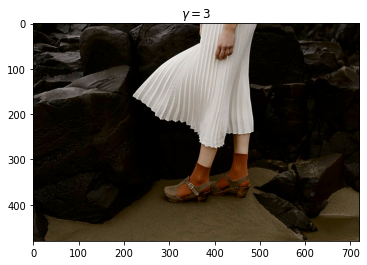

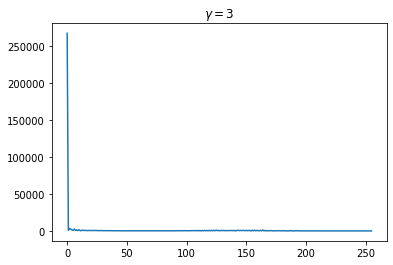

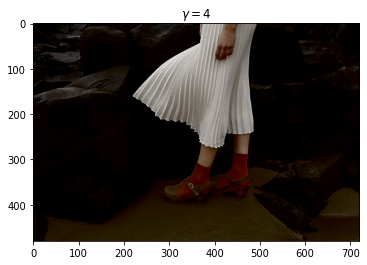

In [4]:
#Quetion 3
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert f is not None
Lab = cv.cvtColor(f, cv.COLOR_BGR2LAB)

L, a, b = cv.split(Lab)
gamma = [0.2 , 0.8, 1, 1.7, 3]
hist_f = cv.calcHist([f], [0], None, [256], [0,256])

fig, ax = plt.subplots()
ax.plot(hist_f)
plt.title("Original image")

for i in range (0,5):
    t = np.array([(p/255.0)**gamma[i]*(255.0) for p in L]).astype(np.uint8)
    newLab = cv.merge([t,a,b])
    newf = cv.cvtColor(newLab, cv.COLOR_LAB2BGR)
    hist_newf = cv.calcHist([newf], [0], None, [256], [0,256])

    fig, ax = plt.subplots()
    ax.plot(hist_newf)
    plt.title("$\gamma = $"+ str(gamma[i]))

    img = cv.cvtColor(newf, cv.COLOR_BGR2RGB)
    fig, ax = plt.subplots()
    plt.title("$\gamma = $"+ str(i))
    ax.imshow(img)
    plt.show()

    
    # cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
    # cv.imshow("Image", newf)
    # cv.waitKey(0)
    # cv.destroyAllWindows()


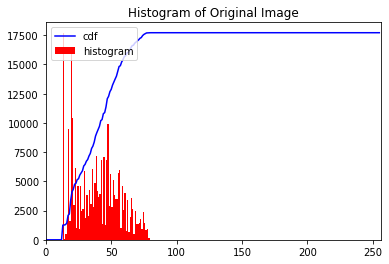

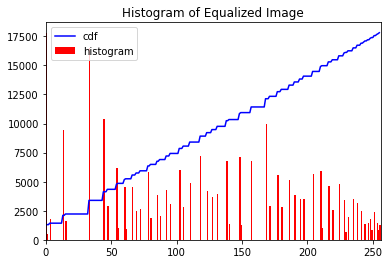

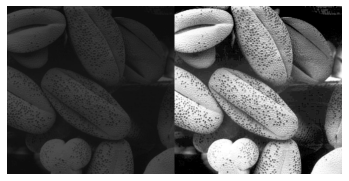

In [8]:
#Quetion 4
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\shells.png",cv.IMREAD_GRAYSCALE)
assert f is not None

def gethist_of(img):
    hist, bins = np.histogram(img.ravel(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(), 256, [0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title("Histogram of Original Image")
    plt.show()

    return 0


def getequaized_hist(img):
    equ = cv.equalizeHist(img)
    hist, bins = np.histogram(equ.ravel(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(equ.flatten(), 256, [0,256], color ='r')
    plt.xlim([0,256])
    plt.legend(('cdf', 'histogram'), loc = 'upper left')
    plt.title("Histogram of Equalized Image")
    plt.show()
    res = np.hstack((img,equ))
    plt.axis('off')
    plt.imshow(res, cmap = 'gray')

    return 0


gethist_of(f)
getequaized_hist(f)
equ = cv.equalizeHist(f)

# cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
# cv.imshow('Image', f)
# cv.waitKey(0)
# cv.destroyAllWindows()

# cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
# cv.imshow('Image', equ)
# cv.waitKey(0)
# cv.destroyAllWindows()




In [60]:
#Question 5
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 


def euclidian_dist(a,b):
    '''
    Euclidian distance between 2 points a(x_a, y_a) and b(x_b, y_b)
    Distance = Square Root ( (x_a - x_b)^2 +  (y_a - y_b)^2 )
    '''
    return np.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))


def near_neighbour(X,P):
    '''
    The nearest neighbour of point X(x,y) to the centroid P(x_p, y_p)
    The Neighbourhood is defined by the Upper-Left corner of the point X, which means 3 neighbours and the point X. 
    '''
    i,j = X[0],X[1]
    A = [[i,j],[i,j+1],[i+1,j],[i+1,j+1]]
    dist = [euclidian_dist(A[0],P),euclidian_dist(A[1],P),euclidian_dist(A[2],P),euclidian_dist(A[3],P)]
    minpos = dist.index(min(dist))
    return A[minpos]        


def NN_interpolation(im,scale_factor):
    '''
    Interpolation of the image im with scale factor scale_factor, using Nearest Neighbour.
    '''
    row, col = im.shape[0], im.shape[1]
    n_row,n_col = int(scale_factor * row),int(scale_factor * col)
    # fill in  img
    zoom = np.arange(n_row*n_col).reshape(n_row,n_col)
    print("zoom shape is: ",zoom.shape,"image shape is: ", im.shape,'\n')
    for i in range(n_row):
        for j in range(n_col):
            P = [float(i)/scale_factor,float(j)/scale_factor]
            X = [int(i) for i in P]
            zoom[i][j] = im[near_neighbour(X,P)[0]][near_neighbour(X,P)[1]]
    return zoom
#-------------------------
# Example
#=========================
im = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\einstein.png", cv.IMREAD_GRAYSCALE)

J = NN_interpolation(im,3)

plt.figure(num='NN-Interpolation')
plt.subplot()
plt.subplot(121)
imgplot = plt.imshow(im,cmap="gray") # Displaying the image
plt.title('Original')

plt.subplot(122)
imgplot = plt.imshow(J,cmap="gray") # Displaying the image
plt.title('Zoomed')

plt.show()

print(im.shape,J.shape)

zoom shape is:  (1140, 1092) image shape is:  (380, 364) 



IndexError: index 364 is out of bounds for axis 0 with size 364

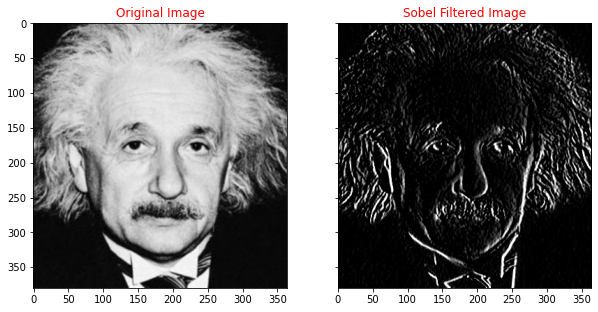

In [61]:
#Question 6(a)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\einstein.png", cv.IMREAD_GRAYSCALE)

kernel = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype='float')
imgc = cv.filter2D(img, -1, kernel)
# print(img.shape)
# image_float = cv.normalize(img.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
# print(image_float.shape)


fig, ax = plt.subplots(1, 2 , sharex = 'all', sharey = 'all', figsize = (10,10))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image', color = 'r')
ax[1].imshow(imgc, cmap = 'gray')
ax[1].set_title('Sobel Filtered Image', color ='r')
plt.show()


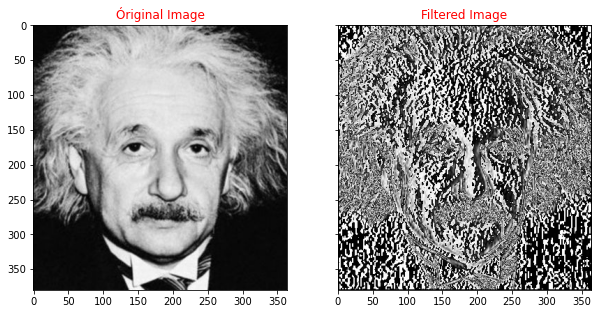

In [62]:
#Question 6(b)
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import math


def filter (image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0]/2) , math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh+1, n-k_hw:n+ k_hw+1].flatten(), kernel.flatten())

    return result

img = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\einstein.png", cv.IMREAD_GRAYSCALE)
sobel_H = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype='float')
imgc = filter(img, sobel_H)
imgc = imgc*255.0
imgc = imgc.astype(np.uint8)


fig, ax = plt.subplots(1,2, sharex= 'all', sharey= 'all', figsize = (10,10))
ax[0].imshow(img, cmap ='gray')
ax[0].set_title('Óriginal Image', color = 'r')
ax[1].imshow(imgc, cmap ='gray')
ax[1].set_title('Filtered Image', color ='r')
plt.show()




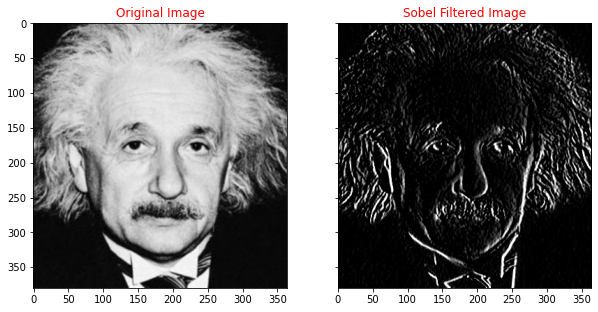

In [63]:
#Question 6(c)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\einstein.png", cv.IMREAD_GRAYSCALE)

array_1 = np.array([[1],[2],[1]], dtype='float')
array_2 = np.array([[1, 0, -1]], dtype='float')
array_3 = np.dot(array_1,array_2)

#kernel = np.array([(array_3[0]),(array_3[1]),(array_3[2])], dtype='float')
imgc = cv.filter2D(img, -1, array_3)

fig, ax = plt.subplots(1, 2 , sharex = 'all', sharey = 'all', figsize = (10,10))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image', color = 'r')
ax[1].imshow(imgc, cmap = 'gray')
ax[1].set_title('Sobel Filtered Image', color ='r')
plt.show()
